# **Customer Churn Prediction MACHINE LEARNING Model Comparison**

# 1. Problem Understanding
The testing file for the churn dataset consists of 64,374 customer records and serves as a separate dataset for evaluating the performance and generalization capabilities of trained churn prediction models. Each record in the testing file corresponds to a customer and contains the same set of features as the training file, such as age, gender, tenure, usage frequency, support calls, payment delay, subscription type, contract length, total spend, and last interaction. However, the churn labels are not included in the testing file as they are used for assessing the accuracy and effectiveness of the churn prediction models. The testing file allows businesses to assess the predictive power of their trained models on unseen data and gain insights into how well the models generalize to new customers. By analyzing the model's performance on the testing file, businesses can gauge the effectiveness of their churn prediction strategies and make informed decisions to optimize customer retention efforts.

# 2. Importing Required Packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 3. Data Collection

In [10]:
# Load data

df = pd.read_csv("customer_churn.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


# 4. Data Cleaning

In [11]:
print(df.shape)

(64374, 12)


In [12]:
print(df.dtypes)

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object


In [13]:
print(df.isna().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


# 5. Exploratory Data Analysis

In [14]:
print(df['Churn'].value_counts())

Churn
0    33881
1    30493
Name: count, dtype: int64


## Churn Distribution (Target Balance Check)

Shows whether the dataset is balanced or imbalanced.

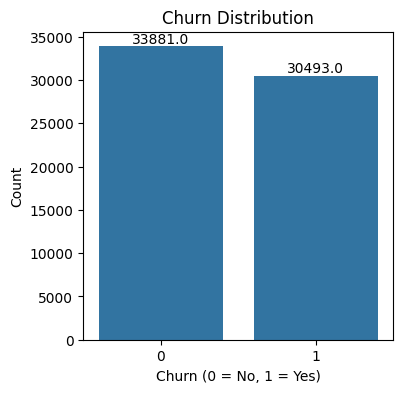

In [16]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df["Churn"])

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## Numeric Feature Distributions

### Check how important features differ between churn vs non-churn.

#### Example: Tenure vs Churn

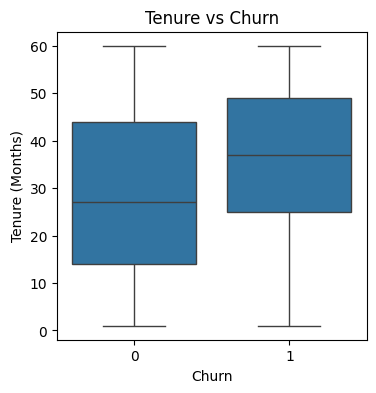

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["Churn"], y=df["Tenure"])
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


# Example: Monthly Usage vs Churn

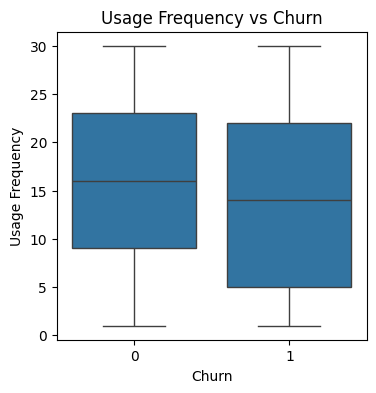

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["Churn"], y=df["Usage Frequency"])
plt.title("Usage Frequency vs Churn")
plt.show()


# 6. Feature Engineering

In [23]:
df = df.drop(columns=['CustomerID'])

In [24]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [25]:
X = df.drop('Churn', axis=1)  # features
y = df['Churn']               # target


In [26]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [27]:
cat_cols = ["Gender", "Subscription Type", "Contract Length"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.dtypes)


Age                           int64
Tenure                        int64
Usage Frequency               int64
Support Calls                 int64
Payment Delay                 int64
Total Spend                   int64
Last Interaction              int64
Churn                         int64
Gender_Male                    bool
Subscription Type_Premium      bool
Subscription Type_Standard     bool
Contract Length_Monthly        bool
Contract Length_Quarterly      bool
dtype: object


In [28]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

In [29]:
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype('int64')

print(df_encoded.dtypes)   # now everything should be int64


Age                           int64
Tenure                        int64
Usage Frequency               int64
Support Calls                 int64
Payment Delay                 int64
Total Spend                   int64
Last Interaction              int64
Churn                         int64
Gender_Male                   int64
Subscription Type_Premium     int64
Subscription Type_Standard    int64
Contract Length_Monthly       int64
Contract Length_Quarterly     int64
dtype: object


# Correlation Heatmap

Shows which features influence churn.



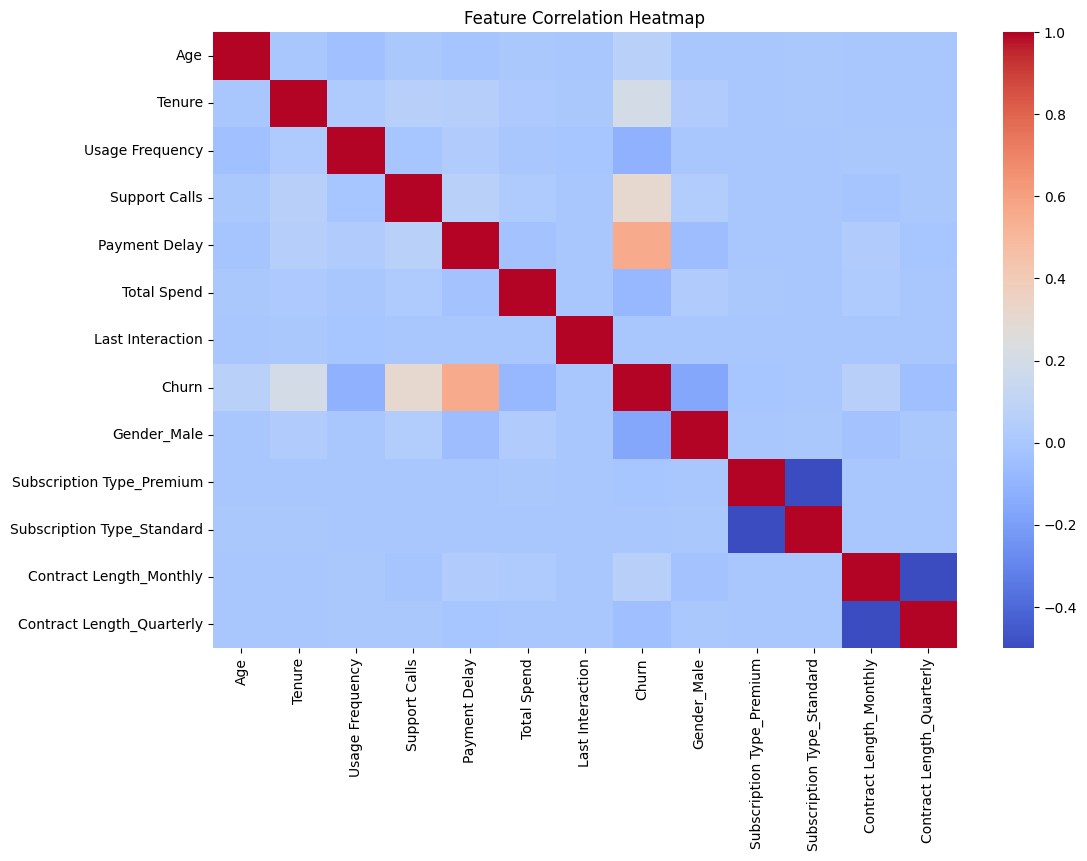

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# Churn by Categorical Variables (Gender vs Churn)

These visuals impress interviewers.



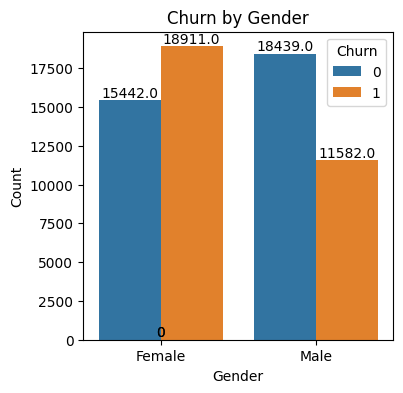

In [34]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df["Gender"], hue=df["Churn"])

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Subscription Type vs Churn



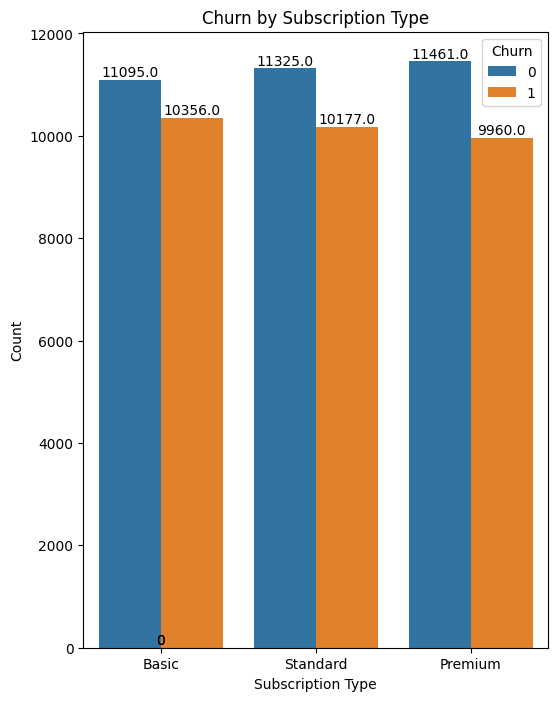

In [41]:
plt.figure(figsize=(6,8))
ax = sns.countplot(x=df["Subscription Type"], hue=df["Churn"])

# Add labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Churn by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# Contract Length vs Churn


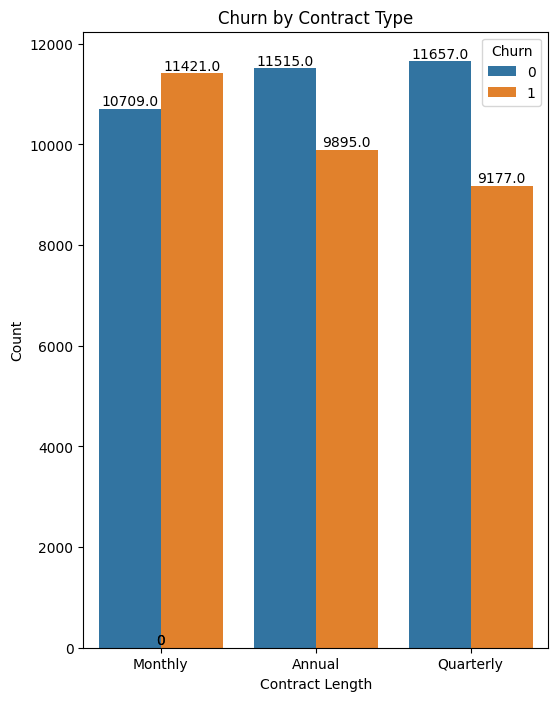

In [43]:
plt.figure(figsize=(6,8))
ax = sns.countplot(x=df["Contract Length"], hue=df["Churn"])

# Add labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Churn by Contract Type")
plt.xlabel("Contract Length")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# Pairplot for Quick Insight




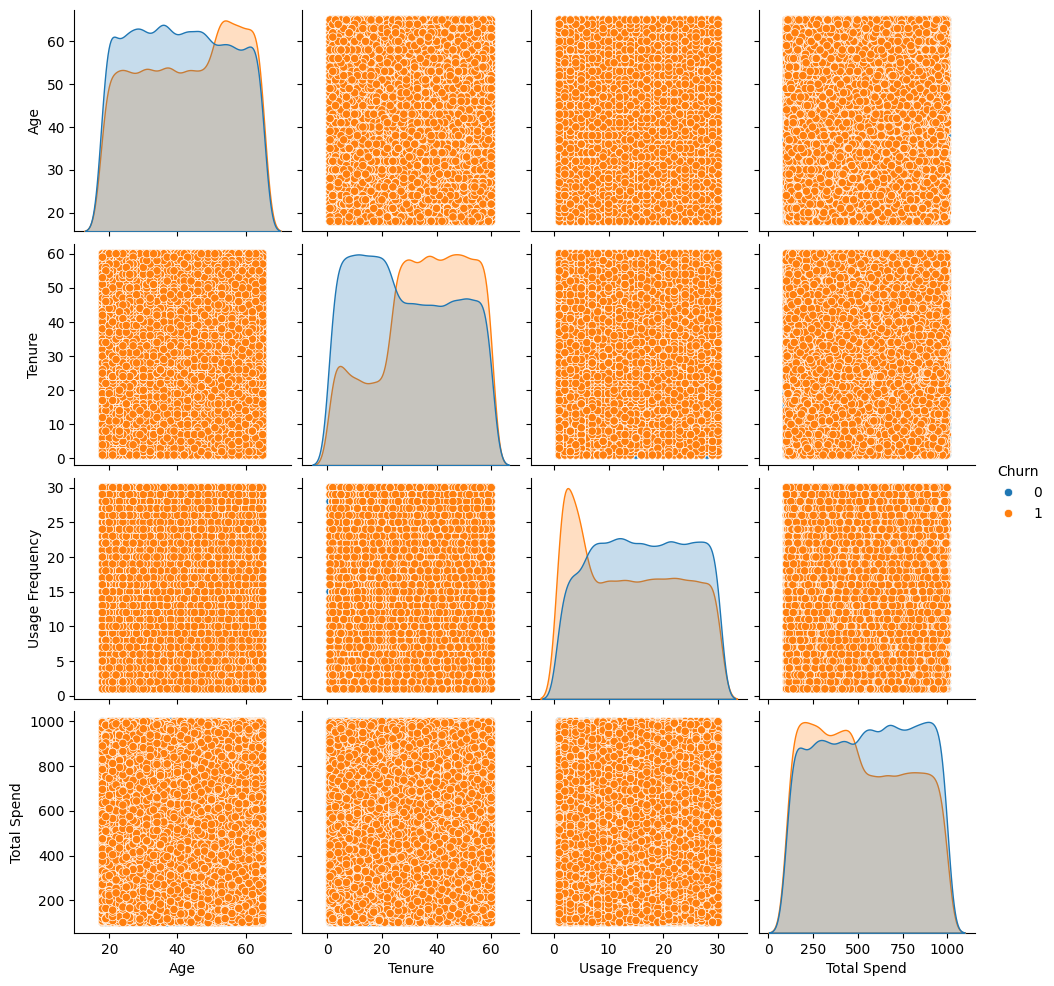

In [44]:
sns.pairplot(df_encoded[["Age", "Tenure", "Usage Frequency", "Total Spend", "Churn"]], hue="Churn")
plt.show()

# 7. Model Selection

In [47]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
    ),
}

# 8. Training and Testing

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature Importance (Random Forest / XGBoost)
For Random Forest:



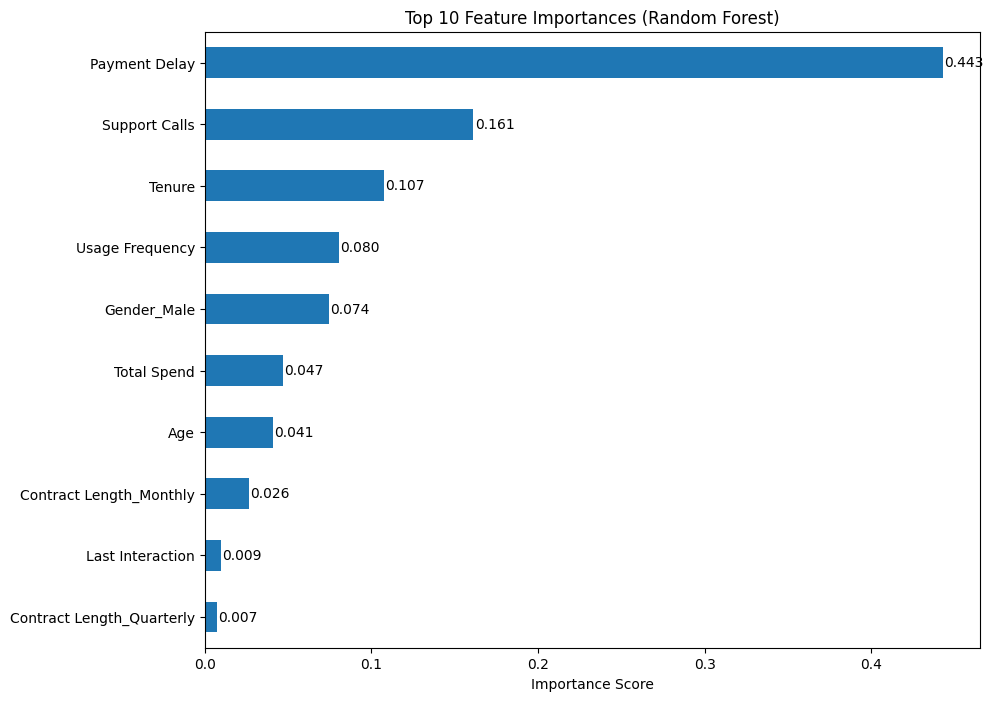

In [53]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.nlargest(10).sort_values()

ax = top10.plot(kind='barh', figsize=(10,8))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")

# Add labels on bars
for i, v in enumerate(top10):
    ax.text(v + 0.001, i, f"{v:.3f}", va='center')

plt.show()


For XGBoost:


<Figure size 1000x600 with 0 Axes>

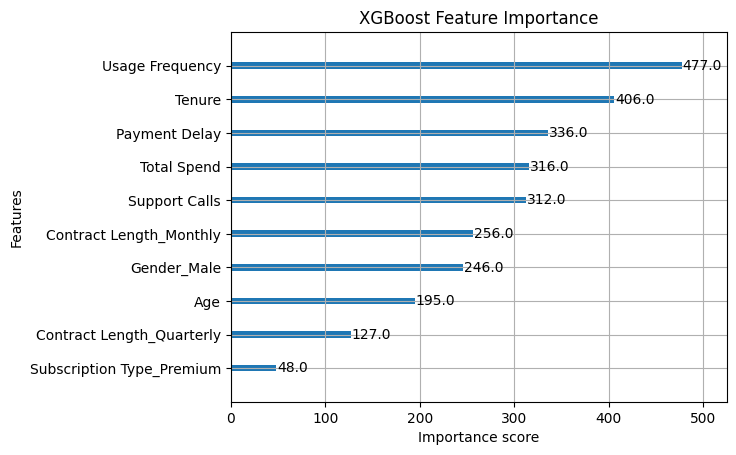

In [52]:
from xgboost import plot_importance

xgb = XGBClassifier(
    n_estimators=200, max_depth=4, learning_rate=0.1,
    subsample=0.8, colsample_bytree=0.8, eval_metric="logloss"
)
xgb.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_importance(xgb, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()

# 9. Model Evaluation

In [54]:
results = []

for name, model in models.items():
    # Use scaled data for these models
    use_scaled = name in ["Logistic Regression", "KNN", "SVM", "Naive Bayes"]
    X_tr = X_train_scaled if use_scaled else X_train
    X_te = X_test_scaled if use_scaled else X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    # Some models have predict_proba, some don’t
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        # For models without predict_proba, fallback using decision_function
        if hasattr(model, "decision_function"):
            scores = model.decision_function(X_te)
            # Scale scores to 0-1
            y_prob = (scores - scores.min()) / (scores.max() - scores.min())
        else:
            y_prob = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append(
        {
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1,
            "ROC_AUC": roc,
        }
    )

results_df = pd.DataFrame(results).sort_values(by="ROC_AUC", ascending=False)
print("\nModel comparison:")
print(results_df)



Model comparison:
                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
6              XGBoost  0.999689   0.999508  0.999836  0.999672  0.999999
3        Random Forest  0.998214   0.999178  0.997049  0.998112  0.999990
2        Decision Tree  0.998058   0.997380  0.998524  0.997952  0.998082
5                  SVM  0.938874   0.921989  0.951467  0.936496  0.988565
1                  KNN  0.910602   0.880031  0.939334  0.908716  0.967689
4          Naive Bayes  0.836738   0.808268  0.859157  0.832936  0.908691
0  Logistic Regression  0.827107   0.813603  0.823742  0.818641  0.903000


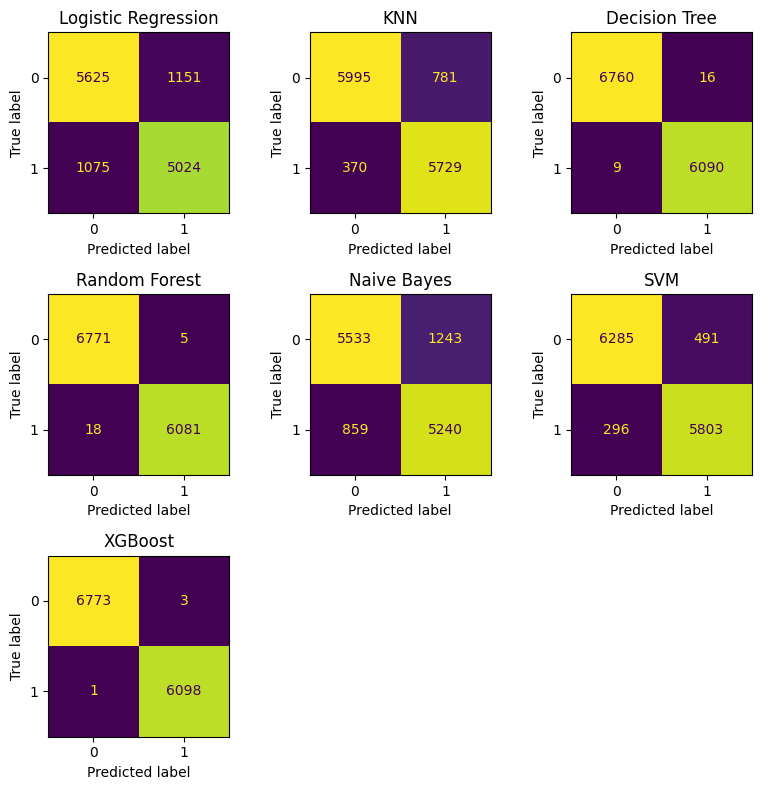

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Number of models
n_models = len(models)

# Create subplots grid
cols = 3  # 3 plots per row (adjust if needed)
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    # Check scaling
    use_scaled = name in ["Logistic Regression", "KNN", "Naive Bayes", "SVM"]
    X_te = X_test_scaled if use_scaled else X_test

    # Predictions
    y_pred = model.predict(X_te)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        ax=axes[idx],
        colorbar=False
    )

    axes[idx].set_title(name)

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 10. Hyperparameter Tuning
## Random Forest Grid Search (Exhaustive Search)


In [59]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300], #Number of trees in the forest
    "max_depth": [4, 6, 8, None],    #depth of each tree (None → grow to full depth)
    "min_samples_split": [2, 5, 10], #Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]    #Minimum samples required at the leaf node
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    params,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print(grid.best_params_)
print("Best ROC AUC:", grid.best_score_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC: 0.9999821507111363


In [58]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
output_dir = "models"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# `model` and `scaler` were not defined in the scope where this cell was executed
# They need to be defined or retrieved from the global scope.
# Looking at the kernel state, `best_model` holds the best model.
# `scaler` is available from the scaling step.

joblib.dump(best_model, os.path.join(output_dir, "best_model.pkl"))
joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))

['models/scaler.pkl']